In [1]:
%matplotlib inline


# Compute Sepal score

This example shows how to compute the Sepal score for spatially variable genes identification.

The Sepal score is a method that simulates a diffusion process to quantify spatial structure in tissue.
See {cite}`andersson2021` for reference.

:::{seealso}:

    - See {doc}`compute_co_occurrence` and
      {doc}`compute_moran` for other scores to identify spatially variable genes.
    - See {doc}`compute_spatial_neighbors` for general usage of
      {func}`squidpy.gr.spatial_neighbors`.

:::


In [3]:
import squidpy as sq

adata = sq.datasets.visium_hne_adata()
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

We can compute the Sepal score with {func}`squidpy.gr.sepal`.
there are 2 important aspects to consider when computing sepal:

- The function only accepts grid-like spatial graphs. Make sure to specify the
  maximum number of neighbors in your data (6 for an hexagonal grid like Visium)
  with ``max_neighs = 6``.
- It is useful to filter out genes that are expressed in very few observations
  and might be wrongly identified as being spatially variable. If you are performing
  pre-processing with Scanpy, there is a convenient function that can be used BEFORE
  normalization {func}`scanpy.pp.calculate_qc_metrics`. It computes several useful
  summary statistics on both observation and feature axis. We will be using the
  ``n_cells`` columns in {attr}`adata.var` to filter out genes that are expressed in
  less than 100 observations.

Before computing the Sepal score, we first need to compute a spatial graph with {func}`squidpy.gr.spatial_neighbors`.
We will also subset the number of genes to evaluate for efficiency purposes.



In [4]:
sq.gr.spatial_neighbors(adata)
genes = adata.var_names[(adata.var.n_cells > 100) & adata.var.highly_variable][0:100]
sq.gr.sepal(adata, max_neighs=6, genes=genes, n_jobs=1)
adata.uns["sepal_score"].head(10)

  0%|          | 0/100 [00:00<?, ?/s]

,sepal_score
Lct,7.868
1500015O10Rik,7.085
Ecel1,5.274
Fzd5,4.694
Cfap65,4.095
C1ql2,3.144
Slc9a2,2.947
Gm17634,2.904
St18,2.584
Des,2.494


We can visualize some of those genes with {func}`squidpy.pl.spatial_scatter`.



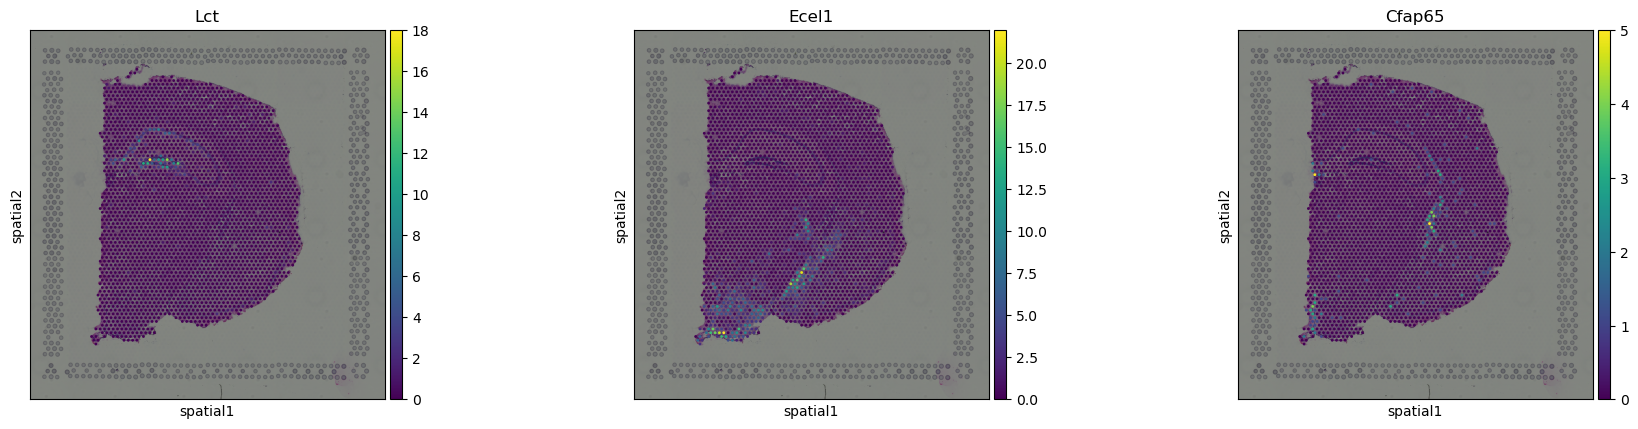

In [5]:
sq.pl.spatial_scatter(adata, color=["Lct", "Ecel1", "Cfap65"])